In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#Reading all the data for Quarter 1 In 2021
data_1=pd.read_csv('202101-divvy-tripdata.csv')
data_2=pd.read_csv('202102-divvy-tripdata.csv')
data_3=pd.read_csv('202103-divvy-tripdata.csv')
data_4=pd.read_csv('202104-divvy-tripdata.csv')

In [3]:
#Understanding the data with their Data Types and if the different tables have similar data so we can union them.
data_1.info()
data_2.info()
data_3.info()
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 13 colum

In [4]:
#since all the data and datatypes are same i can union them and process my analysis on them
quarter_1=pd.concat([data_1,data_2,data_3,data_4])
quarter_1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337225,461A6B0728E063DB,classic_bike,2021-04-09 17:09:03,2021-04-09 17:16:16,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898587,-87.621915,41.896747,-87.635668,member
337226,CF1D3A35E3654F6F,docked_bike,2021-04-04 13:27:08,2021-04-04 14:41:11,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,casual
337227,4308ADB9171ACE49,classic_bike,2021-04-30 18:15:40,2021-04-30 19:12:44,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,member
337228,04DFB53077A17DA2,electric_bike,2021-04-18 11:40:37,2021-04-18 11:46:03,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898263,-87.622416,41.894942,-87.630438,member


In [5]:
quarter_1.shape

(712182, 13)

In [6]:
#Understanding all the null values in the data
quarter_1.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    53575
start_station_id      53575
end_station_name      60536
end_station_id        60536
start_lat                 0
start_lng                 0
end_lat                 751
end_lng                 751
member_casual             0
dtype: int64

In [7]:
#Dropping all the null values because it would be an issue for analyzing the data with missing values
quarter_1=quarter_1.dropna()

In [8]:
quarter_1.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [9]:
#After dropping all the null values this is the shape of our data
quarter_1.shape

(630403, 13)

In [10]:
quarter_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630403 entries, 9 to 337229
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             630403 non-null  object 
 1   rideable_type       630403 non-null  object 
 2   started_at          630403 non-null  object 
 3   ended_at            630403 non-null  object 
 4   start_station_name  630403 non-null  object 
 5   start_station_id    630403 non-null  object 
 6   end_station_name    630403 non-null  object 
 7   end_station_id      630403 non-null  object 
 8   start_lat           630403 non-null  float64
 9   start_lng           630403 non-null  float64
 10  end_lat             630403 non-null  float64
 11  end_lng             630403 non-null  float64
 12  member_casual       630403 non-null  object 
dtypes: float64(4), object(9)
memory usage: 67.3+ MB


In [11]:
#Started and ended are at date and time format so i want to change the datatype of started at and ended at to be datetime
quarter_1['started_at']=pd.to_datetime(quarter_1['started_at'])
quarter_1['ended_at']=pd.to_datetime(quarter_1['ended_at'])

/var/folders/qp/0m2plrhn7nggzqn76yc1p7dm0000gn/T/ipykernel_48505/3478019046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_1['started_at']=pd.to_datetime(quarter_1['started_at'])
/var/folders/qp/0m2plrhn7nggzqn76yc1p7dm0000gn/T/ipykernel_48505/3478019046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_1['ended_at']=pd.to_datetime(quarter_1['ended_at'])


In [12]:
quarter_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630403 entries, 9 to 337229
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             630403 non-null  object        
 1   rideable_type       630403 non-null  object        
 2   started_at          630403 non-null  datetime64[ns]
 3   ended_at            630403 non-null  datetime64[ns]
 4   start_station_name  630403 non-null  object        
 5   start_station_id    630403 non-null  object        
 6   end_station_name    630403 non-null  object        
 7   end_station_id      630403 non-null  object        
 8   start_lat           630403 non-null  float64       
 9   start_lng           630403 non-null  float64       
 10  end_lat             630403 non-null  float64       
 11  end_lng             630403 non-null  float64       
 12  member_casual       630403 non-null  object        
dtypes: datetime64[ns](2), float64

In [13]:
#Now i want to understand the ride duration for every ride
quarter_1['duration']=(quarter_1['ended_at']-quarter_1['started_at'])/dt.timedelta(minutes=1)

/var/folders/qp/0m2plrhn7nggzqn76yc1p7dm0000gn/T/ipykernel_48505/1426516857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_1['duration']=(quarter_1['ended_at']-quarter_1['started_at'])/dt.timedelta(minutes=1)


In [14]:
quarter_1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,7.216667
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,4.533333
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,9.783333
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,8.950000
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,10.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337225,461A6B0728E063DB,classic_bike,2021-04-09 17:09:03,2021-04-09 17:16:16,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898587,-87.621915,41.896747,-87.635668,member,7.216667
337226,CF1D3A35E3654F6F,docked_bike,2021-04-04 13:27:08,2021-04-04 14:41:11,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,casual,74.050000
337227,4308ADB9171ACE49,classic_bike,2021-04-30 18:15:40,2021-04-30 19:12:44,Mies van der Rohe Way & Chestnut St,15529,Streeter Dr & Grand Ave,13022,41.898587,-87.621915,41.892278,-87.612043,member,57.066667
337228,04DFB53077A17DA2,electric_bike,2021-04-18 11:40:37,2021-04-18 11:46:03,Mies van der Rohe Way & Chestnut St,15529,Franklin St & Chicago Ave,13017,41.898263,-87.622416,41.894942,-87.630438,member,5.433333


In [15]:
#now i want to see the min max mean std for the Quarter_1 data
quarter_1.describe()

,start_lat,start_lng,end_lat,end_lng,duration
count,630403.000000,630403.000000,630403.000000,630403.000000,630403.000000
mean,41.902285,-87.643421,41.902609,-87.643679,22.179656
std,0.042048,0.023682,0.042102,0.023752,189.273928
min,41.648501,-87.774704,41.648501,-87.774704,-0.166667
25%,41.881690,-87.655681,41.881892,-87.656853,6.816667
50%,41.896750,-87.640305,41.896917,-87.641043,12.050000
75%,41.926277,-87.627691,41.928640,-87.627734,22.316667
max,42.064854,-87.528232,42.064863,-87.528232,47776.700000


In [16]:
#since by the above information we can understand the min duration is less than 0 we have to remove the data which is below 0 
quarter_1=quarter_1[quarter_1['duration']>=0]

In [17]:
quarter_1.shape

(630397, 14)

In [18]:
#The reason of me not removing duration with 0 too is because a rider can book a ride and didnt want to take 
#it and cancell it immediately
quarter_1.describe()

,start_lat,start_lng,end_lat,end_lng,duration
count,630397.000000,630397.000000,630397.000000,630397.000000,630397.000000
mean,41.902285,-87.643421,41.902609,-87.643679,22.179868
std,0.042048,0.023682,0.042102,0.023752,189.274816
min,41.648501,-87.774704,41.648501,-87.774704,0.000000
25%,41.881690,-87.655681,41.881892,-87.656853,6.816667
50%,41.896750,-87.640297,41.896915,-87.641042,12.050000
75%,41.926277,-87.627691,41.928641,-87.627734,22.316667
max,42.064854,-87.528232,42.064863,-87.528232,47776.700000


In [19]:
quarter_1['trip_month'] = quarter_1['started_at'].dt.strftime('%B-%y')
quarter_1['trip_week'] = quarter_1['started_at'].dt.strftime("%U-%b")
quarter_1['trip_day'] = quarter_1['started_at'].dt.strftime("%A")

/var/folders/qp/0m2plrhn7nggzqn76yc1p7dm0000gn/T/ipykernel_48505/3367751785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_1['trip_month'] = quarter_1['started_at'].dt.strftime('%B-%y')
/var/folders/qp/0m2plrhn7nggzqn76yc1p7dm0000gn/T/ipykernel_48505/3367751785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_1['trip_week'] = quarter_1['started_at'].dt.strftime("%U-%b")
/var/folders/qp/0m2plrhn7nggzqn76yc1p7dm0000gn/T/ipykernel_48505/3367751785.py:3: SettingWithCopyWarning: 
A value 

In [20]:
quarter_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630397 entries, 9 to 337229
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             630397 non-null  object        
 1   rideable_type       630397 non-null  object        
 2   started_at          630397 non-null  datetime64[ns]
 3   ended_at            630397 non-null  datetime64[ns]
 4   start_station_name  630397 non-null  object        
 5   start_station_id    630397 non-null  object        
 6   end_station_name    630397 non-null  object        
 7   end_station_id      630397 non-null  object        
 8   start_lat           630397 non-null  float64       
 9   start_lng           630397 non-null  float64       
 10  end_lat             630397 non-null  float64       
 11  end_lng             630397 non-null  float64       
 12  member_casual       630397 non-null  object        
 13  duration            630397 no

In [21]:
#now i want to see the usage of the rides with both categories we have which are members and casual
stats=quarter_1.groupby('member_casual').agg([np.mean,np.median,np.std,np.min,np.max])['duration']

In [22]:
stats

,mean,median,std,amin,amax
member_casual,,,,,
casual,37.987749,18.366667,319.109126,0.0,47776.70
member,13.743368,9.983333,19.850484,0.0,1474.35


In [23]:
#With the above details we can understand that Casual ride duration is more than Members who have subscribed to cyclist


In [24]:
#now since the max says 47776.70 minutes which is more than 24 hours now i want to see no of members and casuals have more ride duration than a day
ride_morethan_day=quarter_1[quarter_1['duration']>1440]
ride_morethan_day
ride_morethan_day.groupby('member_casual').size().to_frame(name = 'number of users >24h').reset_index()

,member_casual,number of users >24h
0,casual,234
1,member,5


In [25]:
ride_morethan_day

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,trip_month,trip_week,trip_day
10338,701073A16E2A6CAA,docked_bike,2021-01-10 14:52:22,2021-01-13 09:37:28,Desplaines St & Jackson Blvd,15539,Sheridan Rd & Irving Park Rd,13063,41.878287,-87.643909,41.954245,-87.654406,casual,4005.100000,January-21,02-Jan,Sunday
22312,3EC0AF46C4429CBC,classic_bike,2021-01-22 13:55:56,2021-01-23 14:45:00,Ellis Ave & 60th St,KA1503000014,Kimbark Ave & 53rd St,TA1309000037,41.785097,-87.601073,41.799568,-87.594747,casual,1489.066667,January-21,03-Jan,Friday
27814,9FA86E3BEBC938A6,docked_bike,2021-01-05 13:40:47,2021-01-06 16:53:30,Wells St & Huron St,TA1306000012,Wood St & Milwaukee Ave,13221,41.894722,-87.634362,41.907655,-87.672552,casual,1632.716667,January-21,01-Jan,Tuesday
28938,D572868FCDDE515F,docked_bike,2021-01-05 10:18:00,2021-01-07 11:10:06,Lake Shore Dr & Ohio St,TA1306000029,Shedd Aquarium,15544,41.892570,-87.614492,41.867226,-87.615355,casual,2932.100000,January-21,01-Jan,Tuesday
29994,64BEB7FFEE182D2D,docked_bike,2021-01-20 00:23:43,2021-01-21 14:20:56,Greenview Ave & Diversey Pkwy,13294,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.932590,-87.665936,41.889955,-87.680651,casual,2277.216667,January-21,03-Jan,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319062,CEE1D836E2829E2E,docked_bike,2021-04-19 11:31:49,2021-04-21 11:09:41,Columbus Dr & Randolph St,13263,Clark St & Schiller St,TA1309000024,41.884728,-87.619521,41.907993,-87.631501,casual,2857.866667,April-21,16-Apr,Monday
320482,0DF0A8C0B8045CCF,docked_bike,2021-04-07 20:37:03,2021-04-08 21:10:24,Columbus Dr & Randolph St,13263,Wabash Ave & Adams St,KA1503000015,41.884728,-87.619521,41.879472,-87.625689,casual,1473.350000,April-21,14-Apr,Wednesday
324532,3D0636A7DA73912D,docked_bike,2021-04-21 16:26:54,2021-04-22 17:04:48,Sheffield Ave & Fullerton Ave,TA1306000016,Sheffield Ave & Fullerton Ave,TA1306000016,41.925602,-87.653708,41.925602,-87.653708,casual,1477.900000,April-21,16-Apr,Wednesday
332766,F019CF81A6E7006D,docked_bike,2021-04-06 15:51:52,2021-04-12 11:31:25,Woodlawn Ave & Lake Park Ave,KA1503000065,Woodlawn Ave & Lake Park Ave,KA1503000065,41.814093,-87.597005,41.814093,-87.597005,casual,8379.550000,April-21,14-Apr,Tuesday


In [26]:
#now i would want to undrstand where do we have the Cyclistic Stations and thier count of rides in the Quaerter 1
locations=quarter_1.groupby('start_station_name')['ride_id'].size().to_frame(name="No Of Starts").reset_index().sort_values(by='No Of Starts',ascending=False)
locations

,start_station_name,No Of Starts
361,Lake Shore Dr & Monroe St,6573
133,Clark St & Elm St,5882
594,Streeter Dr & Grand Ave,5716
635,Wells St & Elm St,4994
634,Wells St & Concord Ln,4989
...,...,...
573,State St & 76th St,2
322,Kedzie Ave & 104th St,1
302,Hampden Ct & Diversey Ave,1
99,Carpenter St & 63rd St,1


In [27]:
#we have 683 stations where we have Cyclistic Stations
#Now i want to find out the top 20 stations where we have more ride starts
locations.head(20)


,start_station_name,No Of Starts
361,Lake Shore Dr & Monroe St,6573
133,Clark St & Elm St,5882
594,Streeter Dr & Grand Ave,5716
635,Wells St & Elm St,4994
634,Wells St & Concord Ln,4989
208,Dearborn St & Erie St,4821
441,Millennium Park,4760
344,Kingsbury St & Kinzie St,4569
638,Wells St & Huron St,4535
163,Columbus Dr & Randolph St,4518


In [28]:
#I am plotting this data using tableau
locations_plot=locations.head(20)
locations_plot.to_csv("locations_plot.csv", index=False)

In [29]:
#Now i would like to understand the start rides by the location For this i will be using tableau 
locations_lat_lng=quarter_1.groupby(['start_station_name','start_lat','start_lng'])['ride_id'].size().to_frame(name="No Of Starts").reset_index().sort_values(by='No Of Starts',ascending=False)
locations_lat_lng=locations_lat_lng.head(20)
locations_lat_lng.to_csv('locations_lat_lng.csv',index=False)

In [30]:
#Now lets find out the trips which were made by Casual and members by weekdays to understand which day has more usage
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
quarter_1['trip_day'] = pd.Categorical(quarter_1['trip_day'], categories=day_list, ordered=True)

Day_Wise=pd.pivot_table(quarter_1,index=['member_casual', 'trip_day'],
                        aggfunc={'member_casual':np.size,'duration':np.mean}).rename(columns={'member_casual':'total_trips', 'duration':'avg_trip_length'}).reset_index()

/var/folders/qp/0m2plrhn7nggzqn76yc1p7dm0000gn/T/ipykernel_48505/1674550532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_1['trip_day'] = pd.Categorical(quarter_1['trip_day'], categories=day_list, ordered=True)


In [31]:
Day_Wise

,member_casual,trip_day,avg_trip_length,total_trips
0,casual,Monday,39.155455,26946
1,casual,Tuesday,38.450799,29545
2,casual,Wednesday,34.107140,20630
3,casual,Thursday,25.173378,17954
4,casual,Friday,38.478638,30089
5,casual,Saturday,40.070103,51825
6,casual,Sunday,41.345673,42375
7,member,Monday,13.532796,58561
8,member,Tuesday,13.605783,63805
9,member,Wednesday,12.826438,58682


/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


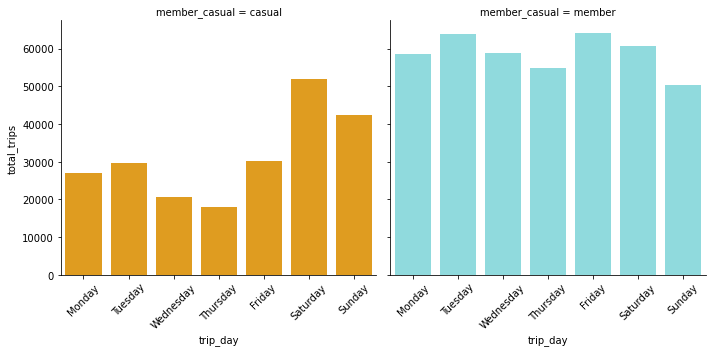

In [33]:
#With casual riders we can see that saturday and sunday there are more rides compared to other days
#With member riders we can understand that members use Cycalistic every Day
import matplotlib.pyplot as plt1
import seaborn as sns
g = sns.FacetGrid(Day_Wise, col='member_casual', hue='member_casual', palette=['orange', '#83e6ea'], height=5)
g.set_xticklabels(rotation=45)
g.map(sns.barplot, 'trip_day', 'total_trips')
plt1.show()

/Users/hiteshvarada/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


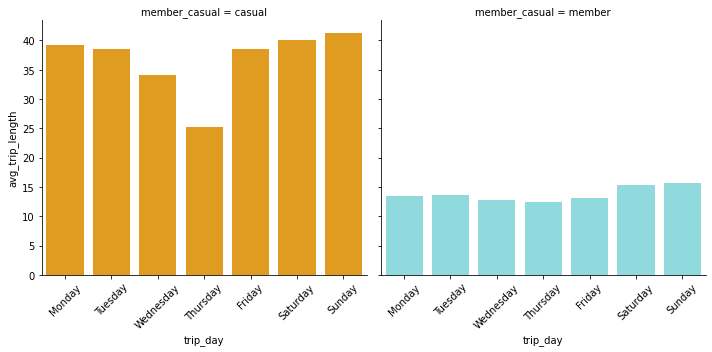

In [34]:
import matplotlib.pyplot as plt1
import seaborn as sns
g = sns.FacetGrid(Day_Wise, col='member_casual', hue='member_casual', palette=['orange', '#83e6ea'], height=5)
g.set_xticklabels(rotation=45)
g.map(sns.barplot, 'trip_day', 'avg_trip_length')
plt1.show()